# General setup

In [12]:
import sympy as sym

In [13]:
x, y = sym.symbols('x y', real=True)

In [14]:
h = sym.Symbol('hbar')
omega1 = sym.Symbol('omega1', real=True)
omega2 = sym.Symbol('omega2', real=True)
n1 = sym.Symbol('n1')
n2 = sym.Symbol('n2')

In [15]:
e = sym.exp
t = sym.Symbol('t', real=True)
c = sym.Symbol('c', real=True)

In [16]:
E_n1n2 = h*( (sym.Rational(1/2) + n1)*omega1 + (sym.Rational(1/2) + n2)*omega2 )
E_n1n2

hbar*(omega1*(n1 + 1/2) + omega2*(n2 + 1/2))

In [17]:
E_n1n2 = E_n1n2.subs(h,1)
E_n1n2

omega1*(n1 + 1/2) + omega2*(n2 + 1/2)

Eigenfunctions 

In [7]:
def psi_n1n2(n1_val, n2_val):
    C_n1n2_numerator = (omega1*omega2)**(sym.Rational(1/4))
    C_n1n2_divider = sym.sqrt(sym.pi* sym.factorial(n1) * sym.factorial(n2)* 2**(n1+n2))
    C_n1n2 = C_n1n2_numerator/C_n1n2_divider
    H_n1 = sym.hermite_poly(n1_val, sym.sqrt(omega1)*x)
    H_n2 = sym.hermite_poly(n2_val, sym.sqrt(omega2)*y)
    expfunc1 = sym.exp(-sym.I*E_n1n2*t)
    expfunc2 = sym.exp(-sym.Rational(1/2)*(omega1*x**2 + omega2*y**2))
    product = C_n1n2*expfunc1*expfunc2
    psi_n1n2 = product.subs([(n1, n1_val),(n2, n2_val)])*H_n1*H_n2
    return psi_n1n2

Wave function

In [8]:
c1, c2 = sym.symbols('c1 c2', real=True)

$\Psi(x,y,t) = \psi_{0,0} + c_1 \psi_{1,0} + c_2 \psi_{1,1}$

In [9]:
Psi = psi_n1n2(0,0) + c1*psi_n1n2(1,0) + c2*psi_n1n2(1,1)

SPECIAL CASE: $\omega_1 = 1$ and $\omega_2 = 1/c^2$

In [17]:
Psi = Psi.subs(omega1,1)
# Psi = Psi.subs(omega2,1/c**2)

In [18]:
Psi = Psi.factor()
Psi

omega2**(1/4)*(sqrt(2)*c1*x*exp(I*omega2*t) + 2*c2*sqrt(omega2)*x*y + exp(I*t)*exp(I*omega2*t))*exp(-x**2/2)*exp(-3*I*t/2)*exp(-omega2*y**2/2)*exp(-3*I*omega2*t/2)/sqrt(pi)

In [23]:
Psi.subs(omega2,1)

(sqrt(2)*c1*x*exp(I*t) + 2*c2*x*y + exp(2*I*t))*exp(-x**2/2)*exp(-y**2/2)*exp(-3*I*t)/sqrt(pi)

# Compute nodal points

Extract LHS factor

In [75]:
factor_main = Psi.args[2]
factor_main

sqrt(2)*c1*x*exp(I*t/c**2)*Abs(c) + 2*c2*x*y + exp(I*t)*exp(I*t/c**2)*Abs(c)

Rewrite $e^{it}$ using polar form

In [76]:
expr = factor_main
expr = expr.rewrite(sym.cos).expand()
expr = expr.simplify()
expr

sqrt(2)*I*c1*x*sin(t/c**2)*Abs(c) + sqrt(2)*c1*x*cos(t/c**2)*Abs(c) + 2*c2*x*y + I*sin(t + t/c**2)*Abs(c) + cos(t + t/c**2)*Abs(c)

Extract REAL part

In [77]:
expr_real = sym.re(expr)
expr_real

sqrt(2)*c1*x*cos(t/c**2)*Abs(c) + 2*c2*x*y + cos(t + t/c**2)*Abs(c)

Extract IMAGINARY part

In [78]:
expr_im = sym.im(expr)
expr_im

sqrt(2)*c1*x*sin(t/c**2)*Abs(c) + sin(t + t/c**2)*Abs(c)

SOLVE $x$ for nodal point

In [79]:
x_nodal = sym.solve(expr_im, x)[0]
x_nodal

-sqrt(2)*sin(t + t/c**2)/(2*c1*sin(t/c**2))

In [80]:
expr_real = expr_real.subs(x, x_nodal).simplify()
expr_real

-(c1*sin(t)*Abs(c) + sqrt(2)*c2*y*sin(t + t/c**2))/(c1*sin(t/c**2))

SOLVE $y$ for nodal point

In [81]:
y_nodal = sym.solve(expr_real, y)[0]
y_nodal

-sqrt(2)*c1*sin(t)*Abs(c)/(2*c2*sin(t + t/c**2))

# Pilot-wave equations $\omega_1 = 1$

We want to work out

\begin{equation}
m \frac{d\mathbf{r}}{dt} = \hbar Im\{ \frac{\nabla \Psi}{\Psi} \}
\end{equation}

In [17]:
from sympy.vector import CoordSys3D, gradient
r = CoordSys3D('r')

In [18]:
Psi = Psi.subs([(x, r.x), (y, r.y)])

$\nabla_{x,y} \Psi = $

In [19]:
Del_Psi = gradient(Psi)
Del_Psi

(-r.x*(2*r.x*r.y*c2 + sqrt(2)*r.x*c1*exp(I*t/c**2)*Abs(c) + exp(I*t)*exp(I*t/c**2)*Abs(c))*exp(-r.x**2/2)*exp(-r.y**2/(2*c**2))*exp(-3*I*t/2)*exp(-3*I*t/(2*c**2))/(sqrt(pi)*Abs(c)**(3/2)) + (2*r.y*c2 + sqrt(2)*c1*exp(I*t/c**2)*Abs(c))*exp(-r.x**2/2)*exp(-r.y**2/(2*c**2))*exp(-3*I*t/2)*exp(-3*I*t/(2*c**2))/(sqrt(pi)*Abs(c)**(3/2)))*r.i + (2*r.x*c2*exp(-r.x**2/2)*exp(-r.y**2/(2*c**2))*exp(-3*I*t/2)*exp(-3*I*t/(2*c**2))/(sqrt(pi)*Abs(c)**(3/2)) - r.y*(2*r.x*r.y*c2 + sqrt(2)*r.x*c1*exp(I*t/c**2)*Abs(c) + exp(I*t)*exp(I*t/c**2)*Abs(c))*exp(-r.x**2/2)*exp(-r.y**2/(2*c**2))*exp(-3*I*t/2)*exp(-3*I*t/(2*c**2))/(sqrt(pi)*c**2*Abs(c)**(3/2)))*r.j

Compute $$Im\{ \frac{\nabla \Psi}{\Psi} \}$$

where $\Psi = $

In [20]:
Psi

(2*r.x*r.y*c2 + sqrt(2)*r.x*c1*exp(I*t/c**2)*Abs(c) + exp(I*t)*exp(I*t/c**2)*Abs(c))*exp(-r.x**2/2)*exp(-r.y**2/(2*c**2))*exp(-3*I*t/2)*exp(-3*I*t/(2*c**2))/(sqrt(pi)*Abs(c)**(3/2))

https://mathworld.wolfram.com/ComplexDivision.html

Division in polar form of two complex numbers $z_1$ and $z_2$ in polar form


\begin{align*}
z_1 = r_1(cos \phi_1 + i sin \phi_1)\\
z_2 = r_2(cos \phi_2 + i sin \phi_2)
\end{align*}

then, taking the 

\begin{equation*}
\frac{z_1}{z_2} = \frac{r_1}{r_2} (cos(\phi_1 - \phi_2) + i sin(\phi_1 - \phi_2))
\end{equation*}

Then,

\begin{equation*}
Im\{ \frac{z_1}{z_2} \} = \frac{r_1}{r_2} sin(\phi_1 - \phi_2)
\end{equation*}


SOURCE https://en.wikipedia.org/wiki/Complex_number#Reciprocal_and_division 

<span style="color:red"><b>NOTE : Conitnue with this</b></span> Michael defined D as the square module of $\Psi$. Then, we take 

$$\frac{\bar{\Psi} \nabla \Psi}{\bar{\Psi} \Psi}$$

In [21]:
expr = Del_Psi/Psi
expr

(sqrt(pi)*(-r.x*(2*r.x*r.y*c2 + sqrt(2)*r.x*c1*exp(I*t/c**2)*Abs(c) + exp(I*t)*exp(I*t/c**2)*Abs(c))*exp(-r.x**2/2)*exp(-r.y**2/(2*c**2))*exp(-3*I*t/2)*exp(-3*I*t/(2*c**2))/(sqrt(pi)*Abs(c)**(3/2)) + (2*r.y*c2 + sqrt(2)*c1*exp(I*t/c**2)*Abs(c))*exp(-r.x**2/2)*exp(-r.y**2/(2*c**2))*exp(-3*I*t/2)*exp(-3*I*t/(2*c**2))/(sqrt(pi)*Abs(c)**(3/2)))*exp(r.x**2/2)*exp(r.y**2/(2*c**2))*exp(3*I*t/2)*exp(3*I*t/(2*c**2))*Abs(c)**(3/2)/(2*r.x*r.y*c2 + sqrt(2)*r.x*c1*exp(I*t/c**2)*Abs(c) + exp(I*t)*exp(I*t/c**2)*Abs(c)))*r.i + (sqrt(pi)*(2*r.x*c2*exp(-r.x**2/2)*exp(-r.y**2/(2*c**2))*exp(-3*I*t/2)*exp(-3*I*t/(2*c**2))/(sqrt(pi)*Abs(c)**(3/2)) - r.y*(2*r.x*r.y*c2 + sqrt(2)*r.x*c1*exp(I*t/c**2)*Abs(c) + exp(I*t)*exp(I*t/c**2)*Abs(c))*exp(-r.x**2/2)*exp(-r.y**2/(2*c**2))*exp(-3*I*t/2)*exp(-3*I*t/(2*c**2))/(sqrt(pi)*c**2*Abs(c)**(3/2)))*exp(r.x**2/2)*exp(r.y**2/(2*c**2))*exp(3*I*t/2)*exp(3*I*t/(2*c**2))*Abs(c)**(3/2)/(2*r.x*r.y*c2 + sqrt(2)*r.x*c1*exp(I*t/c**2)*Abs(c) + exp(I*t)*exp(I*t/c**2)*Abs(c)))*r.j

In [24]:
dx_dt = expr.args[0].simplify()
dx_dt

((-r.x*(2*r.x*r.y*c2 + sqrt(2)*r.x*c1*exp(I*t/c**2)*Abs(c) + exp(I*t*(1 + c**(-2)))*Abs(c)) + 2*r.y*c2 + sqrt(2)*c1*exp(I*t/c**2)*Abs(c))/(2*r.x*r.y*c2 + sqrt(2)*r.x*c1*exp(I*t/c**2)*Abs(c) + exp(I*t + I*t/c**2)*Abs(c)))*r.i

False

In [25]:
dy_dt = expr.args[1].simplify()
dy_dt

((-2*r.x*r.y**2*c2 - sqrt(2)*r.x*r.y*c1*exp(I*t/c**2)*Abs(c) + 2*r.x*c**2*c2 - r.y*exp(I*t + I*t/c**2)*Abs(c))/(c**2*(2*r.x*r.y*c2 + sqrt(2)*r.x*c1*exp(I*t/c**2)*Abs(c) + exp(I*t + I*t/c**2)*Abs(c))))*r.j

In [46]:
Psi*Psi.conjugate()

(2*r.x*r.y*c2 + sqrt(2)*r.x*c1*exp(I*t/c**2)*Abs(c) + exp(I*t)*exp(I*t/c**2)*Abs(c))*(sqrt(2)*c1*exp(-I*t/c**2)*conjugate(r.x)*Abs(c) + 2*c2*conjugate(r.x)*conjugate(r.y) + exp(-I*t)*exp(-I*t/c**2)*Abs(c))*exp(-r.x**2/2)*exp(-r.y**2/(2*c**2))*exp(-conjugate(r.y)**2/(2*c**2))*exp(-conjugate(r.x)**2/2)*conjugate(Abs(c)**(-3/2))/(pi*Abs(c)**(3/2))

__ATTEMPT__ Try expanded form of $\Psi$ as sum of wavefunctions and compute its square module.

In [86]:
Psi

sqrt(2)*c1*x*exp(-I*t*(3/2 + 1/(2*c**2)))*exp(-x**2/2 - y**2/(2*c**2))/(sqrt(pi)*sqrt(Abs(c))) + 2*c2*x*y*exp(-I*t*(3/2 + 3/(2*c**2)))*exp(-x**2/2 - y**2/(2*c**2))/(sqrt(pi)*Abs(c)**(3/2)) + exp(-I*t*(1/2 + 1/(2*c**2)))*exp(-x**2/2 - y**2/(2*c**2))/(sqrt(pi)*sqrt(Abs(c)))

<span style="color:red"><b>CONTINUE HERE</b></span>

In [88]:
Psi_sqr = Psi*Psi.conjugate()
Psi_sqr = Psi_sqr.expand()
Psi_sqr

2*c1**2*x**2*exp(-x**2)*exp(-y**2/c**2)*conjugate(1/sqrt(Abs(c)))/(pi*sqrt(Abs(c))) + 2*sqrt(2)*c1*c2*x**2*y*exp(-x**2)*exp(-y**2/c**2)*exp(I*t/c**2)*conjugate(Abs(c)**(-3/2))/(pi*sqrt(Abs(c))) + 2*sqrt(2)*c1*c2*x**2*y*exp(-x**2)*exp(-y**2/c**2)*exp(-I*t/c**2)*conjugate(1/sqrt(Abs(c)))/(pi*Abs(c)**(3/2)) + sqrt(2)*c1*x*exp(-x**2)*exp(I*t)*exp(-y**2/c**2)*conjugate(1/sqrt(Abs(c)))/(pi*sqrt(Abs(c))) + sqrt(2)*c1*x*exp(-x**2)*exp(-I*t)*exp(-y**2/c**2)*conjugate(1/sqrt(Abs(c)))/(pi*sqrt(Abs(c))) + 4*c2**2*x**2*y**2*exp(-x**2)*exp(-y**2/c**2)*conjugate(Abs(c)**(-3/2))/(pi*Abs(c)**(3/2)) + 2*c2*x*y*exp(-x**2)*exp(I*t)*exp(-y**2/c**2)*exp(I*t/c**2)*conjugate(Abs(c)**(-3/2))/(pi*sqrt(Abs(c))) + 2*c2*x*y*exp(-x**2)*exp(-I*t)*exp(-y**2/c**2)*exp(-I*t/c**2)*conjugate(1/sqrt(Abs(c)))/(pi*Abs(c)**(3/2)) + exp(-x**2)*exp(-y**2/c**2)*conjugate(1/sqrt(Abs(c)))/(pi*sqrt(Abs(c)))

__NOT WORKING__ (Don't continue)

In [92]:
Psi_sqr.simplify()

(2*sqrt(2)*c**2*c1*c2*x**2*y*exp(I*t) + 2*sqrt(2)*c**2*c1*c2*x**2*y*exp(I*t*(1 + 2/c**2)) + 2*c**2*c2*x*y*exp(2*I*t*(1 + c**(-2))) + 2*c**2*c2*x*y + 2*c1**2*x**2*exp(I*t*(1 + c**(-2)))*Abs(c**(3/2))**2 + sqrt(2)*c1*x*exp(I*t/c**2)*Abs(c**(3/2))**2 + sqrt(2)*c1*x*exp(I*t*(2 + c**(-2)))*Abs(c**(3/2))**2 + 4*c2**2*x**2*y**2*exp(I*t*(1 + c**(-2)))*Abs(sqrt(c))**2 + exp(I*t*(1 + c**(-2)))*Abs(c**(3/2))**2)*exp(-I*t - x**2 - I*t/c**2 - y**2/c**2)/(pi*c**4)

# Pilot-Wave equations $\omega_1 \neq 1$

In [1]:
import sympy as sym

In [2]:
x, y = sym.symbols('x y', real=True)

In [3]:
h = sym.Symbol('hbar')
omega1 = sym.Symbol('omega1', real=True)
omega2 = sym.Symbol('omega2', real=True)
n1 = sym.Symbol('n1')
n2 = sym.Symbol('n2')

In [4]:
e = sym.exp
t = sym.Symbol('t', real=True)
c = sym.Symbol('c', real=True)

In [5]:
E_n1n2 = h*( (sym.Rational(1/2) + n1)*omega1 + (sym.Rational(1/2) + n2)*omega2 )
E_n1n2

hbar*(omega1*(n1 + 1/2) + omega2*(n2 + 1/2))

In [6]:
E_n1n2 = E_n1n2.subs(h,1)
E_n1n2

omega1*(n1 + 1/2) + omega2*(n2 + 1/2)

Eigenfunctions 

In [7]:
def psi_n1n2(n1_val, n2_val):
    C_n1n2_numerator = (omega1*omega2)**(sym.Rational(1/4))
    C_n1n2_divider = sym.sqrt(sym.pi* sym.factorial(n1) * sym.factorial(n2)* 2**(n1+n2))
    C_n1n2 = C_n1n2_numerator/C_n1n2_divider
    H_n1 = sym.hermite_poly(n1_val, sym.sqrt(omega1)*x)
    H_n2 = sym.hermite_poly(n2_val, sym.sqrt(omega2)*y)
    expfunc1 = sym.exp(-sym.I*E_n1n2*t)
    expfunc2 = sym.exp(-sym.Rational(1/2)*(omega1*x**2 + omega2*y**2))
    product = C_n1n2*expfunc1*expfunc2
    psi_n1n2 = product.subs([(n1, n1_val),(n2, n2_val)])*H_n1*H_n2
    return psi_n1n2

Wave function

In [8]:
c1 = sym.symbols('c1', real=True)
c2 = sym.symbols('c2', real=True)

## CASE 2

### Wave function

$\Psi(x,y,t) = \psi_{0,0} + c_1 \psi_{1,0}$

In [110]:
Psi = psi_n1n2(0,0) + c1*psi_n1n2(1,0)
Psi

sqrt(2)*c1*sqrt(omega1)*x*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + omega2/2))*exp(-omega1*x**2/2 - omega2*y**2/2)/sqrt(pi) + (omega1*omega2)**(1/4)*exp(-I*t*(omega1/2 + omega2/2))*exp(-omega1*x**2/2 - omega2*y**2/2)/sqrt(pi)

Transform to vector 

In [111]:
from sympy.vector import CoordSys3D, gradient
r = CoordSys3D('r')

In [112]:
Psi = Psi.subs([(x, r.x), (y, r.y)])

In [113]:
Psi

sqrt(2)*r.x*c1*sqrt(omega1)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) + (omega1*omega2)**(1/4)*exp(-I*t*(omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi)

### Compute vector field

$\nabla_{x,y} \Psi = $

In [114]:
Del_Psi = gradient(Psi)
Del_Psi

(-sqrt(2)*r.x**2*c1*omega1**(3/2)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) - r.x*omega1*(omega1*omega2)**(1/4)*exp(-I*t*(omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) + sqrt(2)*c1*sqrt(omega1)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi))*r.i + (-sqrt(2)*r.x*r.y*c1*sqrt(omega1)*omega2*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) - r.y*omega2*(omega1*omega2)**(1/4)*exp(-I*t*(omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi))*r.j

$\frac{\nabla_{x,y} \Psi}{ \Psi}= $

In [115]:
expr = Del_Psi/Psi
expr = expr.simplify()
expr = expr.subs([(r.x, x), (r.y, y)])
expr

((-sqrt(2)*c1*omega1**(3/2)*x**2 + sqrt(2)*c1*sqrt(omega1) - omega1*x*exp(I*omega1*t))/(sqrt(2)*c1*sqrt(omega1)*x + exp(I*omega1*t)))*r.i + (-omega2*y)*r.j

### Simplify vector field

In [107]:
vx = expr.args[0]
vx = vx.subs(sym.exp(sym.I*omega1*t), sym.cos(omega1*t) + sym.I*sym.sin(omega1*t))
vx

((-sqrt(2)*c1*omega1**(3/2)*x**2 + sqrt(2)*c1*sqrt(omega1) - omega1*x*(I*sin(omega1*t) + cos(omega1*t)))/(sqrt(2)*c1*sqrt(omega1)*x + I*sin(omega1*t) + cos(omega1*t)))*r.i

In [108]:
vx.args[1]

-sqrt(2)*c1*omega1**(3/2)*x**2 + sqrt(2)*c1*sqrt(omega1) - omega1*x*(I*sin(omega1*t) + cos(omega1*t))

In [109]:
vx.args[0]

1/(sqrt(2)*c1*sqrt(omega1)*x + I*sin(omega1*t) + cos(omega1*t))

From this, we can compute $Im(\nabla \Psi / \Psi)$

### Vector field: final form

### Second-order pilot wave equations

Define the wave function

In [119]:
Psi = psi_n1n2(0,0) + c1*psi_n1n2(1,0)

Define its conjugate 

In [121]:
Psi_conjugate = Psi.subs(sym.I, -sym.I)

Compute square modules and expand expression

In [147]:
P = (Psi_conjugate*Psi).expand()
P

2*c1**2*omega1*x**2*sqrt(omega1*omega2)*exp(-omega1*x**2)*exp(-omega2*y**2)/pi + sqrt(2)*c1*sqrt(omega1)*x*sqrt(omega1*omega2)*exp(-omega1*x**2)*exp(-omega2*y**2)*exp(I*omega1*t)/pi + sqrt(2)*c1*sqrt(omega1)*x*sqrt(omega1*omega2)*exp(-omega1*x**2)*exp(-omega2*y**2)*exp(-I*omega1*t)/pi + sqrt(omega1*omega2)*exp(-omega1*x**2)*exp(-omega2*y**2)/pi

Simplify each factor separately

In [157]:
p1 = P.args[1]
p1

2*c1**2*omega1*x**2*sqrt(omega1*omega2)*exp(-omega1*x**2)*exp(-omega2*y**2)/pi

In [158]:
# Use Euler's formula
p2 = P.args[2].subs(sym.exp(sym.I*omega1*t), sym.cos(omega1*t) + sym.I*sym.sin(omega1*t))
p2

sqrt(2)*c1*sqrt(omega1)*x*sqrt(omega1*omega2)*(I*sin(omega1*t) + cos(omega1*t))*exp(-omega1*x**2)*exp(-omega2*y**2)/pi

In [159]:
# Use Euler's formula
p3 = P.args[3].subs(sym.exp(-sym.I*omega1*t), sym.cos(omega1*t) - sym.I*sym.sin(omega1*t))
p3

sqrt(2)*c1*sqrt(omega1)*x*sqrt(omega1*omega2)*(-I*sin(omega1*t) + cos(omega1*t))*exp(-omega1*x**2)*exp(-omega2*y**2)/pi

In [160]:
p4 = P.args[0]
p4

sqrt(omega1*omega2)*exp(-omega1*x**2)*exp(-omega2*y**2)/pi

Put everything back together

In [164]:
P_simplified = (p1+p2+p3+p4).simplify()
P_simplified

sqrt(omega1*omega2)*(2*c1**2*omega1*x**2 + 2*sqrt(2)*c1*sqrt(omega1)*x*cos(omega1*t) + 1)*exp(-omega1*x**2 - omega2*y**2)/pi

Wave function amplitude

$R = \sqrt{\Psi^* \Psi}$ = 

In [272]:
R = sym.sqrt(P_simplified)
# substitute constants
R = R.subs([(c1, a/sym.sqrt(2)),(c2, b/2)])
R

sqrt(sqrt(omega1*omega2)*(a**2*omega1*x**2 + 2*a*sqrt(omega1)*x*cos(omega1*t) + 1))*exp(-omega1*x**2/2 - omega2*y**2/2)/sqrt(pi)

Compute quantum potential

$U = -\frac{1}{2} \frac{\nabla^2 R}{R}$

In [273]:
U_x = sym.diff(sym.diff(R,x), x)/R
U_x = U_x.simplify()
U_x

(-a**2*(a*omega1*x + sqrt(omega1)*cos(omega1*t))**2 + a*omega1*(a - 2*x*(a*omega1*x + sqrt(omega1)*cos(omega1*t)))*(a**2*omega1*x**2 + 2*a*sqrt(omega1)*x*cos(omega1*t) + 1) + omega1*(omega1*x**2 - 1)*(a**2*omega1*x**2 + 2*a*sqrt(omega1)*x*cos(omega1*t) + 1)**2)/(a**2*omega1*x**2 + 2*a*sqrt(omega1)*x*cos(omega1*t) + 1)**2

In [274]:
U_x_numerator   = U_x.args[1]
U_x_denominator = 1/U_x.args[0]

In [275]:
U_x_reduced =\
U_x_numerator.args[1]/U_x_denominator +\
U_x_numerator.args[0]/U_x_denominator +\
U_x_numerator.args[2]/U_x_denominator

U_x_reduced

-a**2*(a*omega1*x + sqrt(omega1)*cos(omega1*t))**2/(a**2*omega1*x**2 + 2*a*sqrt(omega1)*x*cos(omega1*t) + 1)**2 + a*omega1*(a - 2*x*(a*omega1*x + sqrt(omega1)*cos(omega1*t)))/(a**2*omega1*x**2 + 2*a*sqrt(omega1)*x*cos(omega1*t) + 1) + omega1*(omega1*x**2 - 1)

In [276]:
U_y = sym.diff(sym.diff(R,y), y)/R
U_y = U_y.simplify()
U_y

omega2*(omega2*y**2 - 1)

In [278]:
U_quantum = -sym.Rational(1,2)*(U_x_reduced + U_y)
U_quantum

a**2*(a*omega1*x + sqrt(omega1)*cos(omega1*t))**2/(2*(a**2*omega1*x**2 + 2*a*sqrt(omega1)*x*cos(omega1*t) + 1)**2) - a*omega1*(a - 2*x*(a*omega1*x + sqrt(omega1)*cos(omega1*t)))/(2*(a**2*omega1*x**2 + 2*a*sqrt(omega1)*x*cos(omega1*t) + 1)) - omega1*(omega1*x**2 - 1)/2 - omega2*(omega2*y**2 - 1)/2

In [281]:
U_classic = sym.Rational(1,2)*( (omega1*x)**2 + (omega2*y)**2 )
U_classic

omega1**2*x**2/2 + omega2**2*y**2/2

In [286]:
U_total = U_classic + U_quantum
U_total

a**2*(a*omega1*x + sqrt(omega1)*cos(omega1*t))**2/(2*(a**2*omega1*x**2 + 2*a*sqrt(omega1)*x*cos(omega1*t) + 1)**2) - a*omega1*(a - 2*x*(a*omega1*x + sqrt(omega1)*cos(omega1*t)))/(2*(a**2*omega1*x**2 + 2*a*sqrt(omega1)*x*cos(omega1*t) + 1)) + omega1**2*x**2/2 - omega1*(omega1*x**2 - 1)/2 + omega2**2*y**2/2 - omega2*(omega2*y**2 - 1)/2

In [298]:
U_total_reduced = 0
for i in range(len(U_total.args)):
    u = U_total.args[i]
    if i in [2, 3]:
        u = u.expand()
    U_total_reduced = u + U_total_reduced

#### Final expression

In [301]:
U_total = U_total_reduced
U_total

a**2*(a*omega1*x + sqrt(omega1)*cos(omega1*t))**2/(2*(a**2*omega1*x**2 + 2*a*sqrt(omega1)*x*cos(omega1*t) + 1)**2) - a*omega1*(a - 2*x*(a*omega1*x + sqrt(omega1)*cos(omega1*t)))/(2*(a**2*omega1*x**2 + 2*a*sqrt(omega1)*x*cos(omega1*t) + 1)) + omega1/2 + omega2/2

NOTE

* This PES is independent of $y$

### Visualise potential energy surface

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

Define evaluating function

In [345]:
PARAMETERS = [1, 3, 1]
a0, omega10, omega20 = PARAMETERS
U_evaluated = lambda t0, x0: float(U_total.evalf(subs={t:t0, x:x0, a:a0, omega1:omega10, omega2:omega20}))

Plot animation of PES in time

<IPython.core.display.Javascript object>


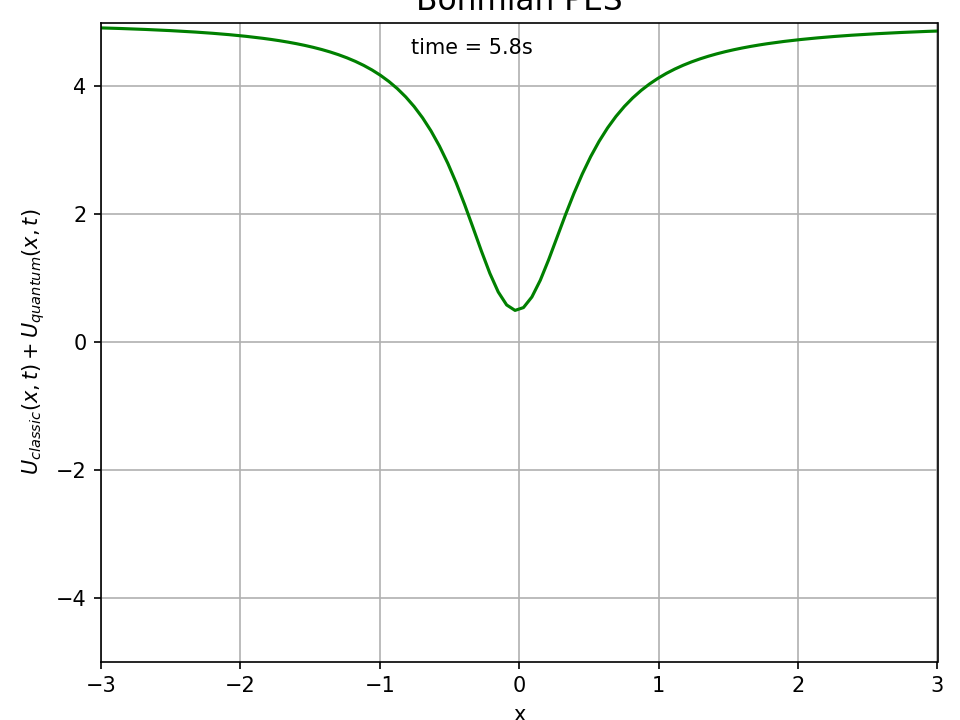

In [346]:
fig, ax1 = plt.subplots(1,1,dpi=100)

X = np.linspace(-6,6,200)
t_axis = np.linspace(0, 2*np.pi, 100)

xdata1, ydata1 = [], []
xdata2, ydata2 = [], []

myplot1, = ax1.plot([],[],'green')

time_template = 'time = %.1fs'
time_text1 = ax1.text(0.37, 0.95, '', transform=ax1.transAxes)


def init():
    ax1.grid(True)
    ax1.set_title("Bohmian PES", fontsize=15)
    ax1.set_xlabel("x")
    ax1.set_ylabel("$U_{classic}(x, t) + U_{quantum}(x, t)$")
    ax1.set_xlim(-3,3)
    ax1.set_ylim(-5,5)
    
#     ax.plot((-1,-1),(0,0.45),color="black",linestyle="--", alpha=0.35)
#     ax.plot(( 1, 1),(0,0.45),color="black",linestyle="--", alpha=0.35)
    return myplot1,
    
def update(i):
    t0 = t_axis[i]
    # clear previous data
    xdata1, ydata1 = [], []
    
    # update curve data
    xdata1.append(X)
    ydata1.append([U_evaluated(t0,x0) for x0 in X])
    
    myplot1.set_data(xdata1, ydata1)
    
    time_text1.set_text(time_template % t0)
    
    return myplot1, time_text1,

anim = animation.FuncAnimation(fig, update, 100, interval=50, init_func=init, blit=True)
# anim.save('animation.gif', writer='imagemagick', fps=50, dpi=200)
fig.tight_layout()
plt.show()

## CASE 3

### Wave function

$\Psi(x,y,t) = \psi_{0,0} + c_2 \psi_{1,1}$

In [9]:
Psi = psi_n1n2(0,0) + c2*psi_n1n2(1,1)
Psi

2*c2*sqrt(omega1)*sqrt(omega2)*x*y*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + 3*omega2/2))*exp(-omega1*x**2/2 - omega2*y**2/2)/sqrt(pi) + (omega1*omega2)**(1/4)*exp(-I*t*(omega1/2 + omega2/2))*exp(-omega1*x**2/2 - omega2*y**2/2)/sqrt(pi)

Transform to vector 

In [10]:
from sympy.vector import CoordSys3D, gradient
r = CoordSys3D('r')

In [11]:
Psi = Psi.subs([(x, r.x), (y, r.y)])

In [12]:
Psi

2*r.x*r.y*c2*sqrt(omega1)*sqrt(omega2)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + 3*omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) + (omega1*omega2)**(1/4)*exp(-I*t*(omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi)

### Compute vector field

$\nabla_{x,y} \Psi = $

In [13]:
Del_Psi = gradient(Psi)
Del_Psi

(-2*r.x**2*r.y*c2*omega1**(3/2)*sqrt(omega2)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + 3*omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) - r.x*omega1*(omega1*omega2)**(1/4)*exp(-I*t*(omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) + 2*r.y*c2*sqrt(omega1)*sqrt(omega2)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + 3*omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi))*r.i + (-2*r.x*r.y**2*c2*sqrt(omega1)*omega2**(3/2)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + 3*omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) + 2*r.x*c2*sqrt(omega1)*sqrt(omega2)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + 3*omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) - r.y*omega2*(omega1*omega2)**(1/4)*exp(-I*t*(omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi))*r.j

$\nabla_{x,y} \Psi / \Psi= $

In [14]:
expr = Del_Psi/Psi
expr = expr.simplify()
expr = expr.subs([(r.x, x), (r.y, y)])
expr

((-2*c2*omega1**(3/2)*sqrt(omega2)*x**2*y + 2*c2*sqrt(omega1)*sqrt(omega2)*y - omega1*x*exp(I*t*(omega1 + omega2)))/(2*c2*sqrt(omega1)*sqrt(omega2)*x*y + exp(I*t*(omega1 + omega2))))*r.i + ((-2*c2*sqrt(omega1)*omega2**(3/2)*x*y**2 + 2*c2*sqrt(omega1)*sqrt(omega2)*x - omega2*y*exp(I*t*(omega1 + omega2)))/(2*c2*sqrt(omega1)*sqrt(omega2)*x*y + exp(I*t*(omega1 + omega2))))*r.j

### Simplify vector field

$\partial_x \Psi / \Psi = $

In [15]:
vx = expr.args[0]
vx = vx.subs(sym.exp(sym.I*t*(omega1 + omega2)), sym.cos(t*(omega1 + omega2)) + sym.I*sym.sin(t*(omega1 + omega2)))
vx

((-2*c2*omega1**(3/2)*sqrt(omega2)*x**2*y + 2*c2*sqrt(omega1)*sqrt(omega2)*y - omega1*x*(I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2))))/(2*c2*sqrt(omega1)*sqrt(omega2)*x*y + I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2))))*r.i

In [16]:
vx.args[1]

-2*c2*omega1**(3/2)*sqrt(omega2)*x**2*y + 2*c2*sqrt(omega1)*sqrt(omega2)*y - omega1*x*(I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2)))

In [17]:
vx.args[0]

1/(2*c2*sqrt(omega1)*sqrt(omega2)*x*y + I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2)))

$\partial_y \Psi / \Psi = $

In [19]:
vy = expr.args[1]
# employ Euler's formula
vy = vy.subs(sym.exp(sym.I*t*(omega1 + omega2)), sym.cos(t*(omega1 + omega2)) + sym.I*sym.sin(t*(omega1 + omega2)))
vy

((-2*c2*sqrt(omega1)*omega2**(3/2)*x*y**2 + 2*c2*sqrt(omega1)*sqrt(omega2)*x - omega2*y*(I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2))))/(2*c2*sqrt(omega1)*sqrt(omega2)*x*y + I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2))))*r.j

In [20]:
vy.args[1]

-2*c2*sqrt(omega1)*omega2**(3/2)*x*y**2 + 2*c2*sqrt(omega1)*sqrt(omega2)*x - omega2*y*(I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2)))

In [21]:
vy.args[0]

1/(2*c2*sqrt(omega1)*sqrt(omega2)*x*y + I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2)))

### Vector field: final form

## CASE 4

### Wave function

$\Psi(x,y,t) = \psi_{0,0} + c_1 \psi_{1,0} + c_2 \psi_{1,1}$

In [44]:
Psi = psi_n1n2(0,0) + c1*psi_n1n2(1,0) + c2*psi_n1n2(1,1)
Psi

sqrt(2)*c1*sqrt(omega1)*x*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + omega2/2))*exp(-omega1*x**2/2 - omega2*y**2/2)/sqrt(pi) + 2*c2*sqrt(omega1)*sqrt(omega2)*x*y*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + 3*omega2/2))*exp(-omega1*x**2/2 - omega2*y**2/2)/sqrt(pi) + (omega1*omega2)**(1/4)*exp(-I*t*(omega1/2 + omega2/2))*exp(-omega1*x**2/2 - omega2*y**2/2)/sqrt(pi)

Transform to vector 

In [45]:
from sympy.vector import CoordSys3D, gradient
r = CoordSys3D('r')

In [46]:
Psi = Psi.subs([(x, r.x), (y, r.y)])

In [47]:
Psi

2*r.x*r.y*c2*sqrt(omega1)*sqrt(omega2)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + 3*omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) + sqrt(2)*r.x*c1*sqrt(omega1)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) + (omega1*omega2)**(1/4)*exp(-I*t*(omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi)

### Compute vector field

$\nabla_{x,y} \Psi = $

In [48]:
Del_Psi = gradient(Psi)
Del_Psi

(-2*r.x**2*r.y*c2*omega1**(3/2)*sqrt(omega2)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + 3*omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) - sqrt(2)*r.x**2*c1*omega1**(3/2)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) - r.x*omega1*(omega1*omega2)**(1/4)*exp(-I*t*(omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) + 2*r.y*c2*sqrt(omega1)*sqrt(omega2)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + 3*omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) + sqrt(2)*c1*sqrt(omega1)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi))*r.i + (-2*r.x*r.y**2*c2*sqrt(omega1)*omega2**(3/2)*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + 3*omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) - sqrt(2)*r.x*r.y*c1*sqrt(omega1)*omega2*(omega1*omega2)**(1/4)*exp(-I*t*(3*omega1/2 + omega2/2))*exp(-r.x**2*omega1/2 - r.y**2*omega2/2)/sqrt(pi) + 2*r.

$\nabla_{x,y} \Psi / \Psi= $

In [49]:
expr = Del_Psi/Psi
expr = expr.simplify()
expr = expr.subs([(r.x, x), (r.y, y)])
expr

((-sqrt(2)*c1*omega1**(3/2)*x**2*exp(I*omega2*t) + sqrt(2)*c1*sqrt(omega1)*exp(I*omega2*t) - 2*c2*omega1**(3/2)*sqrt(omega2)*x**2*y + 2*c2*sqrt(omega1)*sqrt(omega2)*y - omega1*x*exp(I*t*(omega1 + omega2)))/(sqrt(2)*c1*sqrt(omega1)*x*exp(I*omega2*t) + 2*c2*sqrt(omega1)*sqrt(omega2)*x*y + exp(I*t*(omega1 + omega2))))*r.i + ((-sqrt(2)*c1*sqrt(omega1)*omega2*x*y*exp(I*omega2*t) - 2*c2*sqrt(omega1)*omega2**(3/2)*x*y**2 + 2*c2*sqrt(omega1)*sqrt(omega2)*x - omega2*y*exp(I*t*(omega1 + omega2)))/(sqrt(2)*c1*sqrt(omega1)*x*exp(I*omega2*t) + 2*c2*sqrt(omega1)*sqrt(omega2)*x*y + exp(I*t*(omega1 + omega2))))*r.j

### Simplify vector field

$\partial_x \Psi / \Psi = $

In [51]:
vx = expr.args[1]
vx = vx.subs(sym.exp(sym.I*t*(omega1 + omega2)), sym.cos(t*(omega1 + omega2)) + sym.I*sym.sin(t*(omega1 + omega2)))
vx = vx.subs(sym.exp(sym.I*t*omega2), sym.cos(t*omega2) + sym.I*sym.sin(t*omega2))
vx

((-sqrt(2)*c1*omega1**(3/2)*x**2*(I*sin(omega2*t) + cos(omega2*t)) + sqrt(2)*c1*sqrt(omega1)*(I*sin(omega2*t) + cos(omega2*t)) - 2*c2*omega1**(3/2)*sqrt(omega2)*x**2*y + 2*c2*sqrt(omega1)*sqrt(omega2)*y - omega1*x*(I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2))))/(sqrt(2)*c1*sqrt(omega1)*x*(I*sin(omega2*t) + cos(omega2*t)) + 2*c2*sqrt(omega1)*sqrt(omega2)*x*y + I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2))))*r.i

In [52]:
vx.args[1]

-sqrt(2)*c1*omega1**(3/2)*x**2*(I*sin(omega2*t) + cos(omega2*t)) + sqrt(2)*c1*sqrt(omega1)*(I*sin(omega2*t) + cos(omega2*t)) - 2*c2*omega1**(3/2)*sqrt(omega2)*x**2*y + 2*c2*sqrt(omega1)*sqrt(omega2)*y - omega1*x*(I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2)))

In [53]:
vx.args[0]

1/(sqrt(2)*c1*sqrt(omega1)*x*(I*sin(omega2*t) + cos(omega2*t)) + 2*c2*sqrt(omega1)*sqrt(omega2)*x*y + I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2)))

$\partial_y \Psi / \Psi = $

In [54]:
vy = expr.args[0]
# employ Euler's formula
vy = vy.subs(sym.exp(sym.I*t*(omega1 + omega2)), sym.cos(t*(omega1 + omega2)) + sym.I*sym.sin(t*(omega1 + omega2)))
vy = vy.subs(sym.exp(sym.I*t*omega2), sym.cos(t*omega2) + sym.I*sym.sin(t*omega2))
vy

((-sqrt(2)*c1*sqrt(omega1)*omega2*x*y*(I*sin(omega2*t) + cos(omega2*t)) - 2*c2*sqrt(omega1)*omega2**(3/2)*x*y**2 + 2*c2*sqrt(omega1)*sqrt(omega2)*x - omega2*y*(I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2))))/(sqrt(2)*c1*sqrt(omega1)*x*(I*sin(omega2*t) + cos(omega2*t)) + 2*c2*sqrt(omega1)*sqrt(omega2)*x*y + I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2))))*r.j

* Break down division into numerator and denominator to simplify separately

> Use formula

\begin{equation*}
\frac{z_1}{z_2} = \frac{z_1 z_2^*}{z_2 z_2^*} = \frac{z_1 z_2^*}{|z_2|^2}
\end{equation*}

In [55]:
vy.args[1]

-sqrt(2)*c1*sqrt(omega1)*omega2*x*y*(I*sin(omega2*t) + cos(omega2*t)) - 2*c2*sqrt(omega1)*omega2**(3/2)*x*y**2 + 2*c2*sqrt(omega1)*sqrt(omega2)*x - omega2*y*(I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2)))

In [57]:
vy.args[0]

1/(sqrt(2)*c1*sqrt(omega1)*x*(I*sin(omega2*t) + cos(omega2*t)) + 2*c2*sqrt(omega1)*sqrt(omega2)*x*y + I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2)))

TEST

Compute denominator

In [62]:
exp_test = 1/vy.args[0]
exp_test

sqrt(2)*c1*sqrt(omega1)*x*(I*sin(omega2*t) + cos(omega2*t)) + 2*c2*sqrt(omega1)*sqrt(omega2)*x*y + I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2))

In [61]:
exp_test_conjugate = exp_test.subs(sym.I, -sym.I)
exp_test_conjugate

sqrt(2)*c1*sqrt(omega1)*x*(-I*sin(omega2*t) + cos(omega2*t)) + 2*c2*sqrt(omega1)*sqrt(omega2)*x*y - I*sin(t*(omega1 + omega2)) + cos(t*(omega1 + omega2))

In [75]:
vy_denominator = (exp_test*exp_test_conjugate).simplify() # = Psi*Psi 
vy_denominator

2*c1**2*omega1*x**2 + 4*sqrt(2)*c1*c2*omega1*sqrt(omega2)*x**2*y*cos(omega2*t) + 2*sqrt(2)*c1*sqrt(omega1)*x*cos(omega1*t) + 4*c2**2*omega1*omega2*x**2*y**2 + 4*c2*sqrt(omega1)*sqrt(omega2)*x*y*cos(t*(omega1 + omega2)) + 1

In [78]:
a, b = sym.symbols('a b', real=True)
vy_denominator.subs([(c1, a/sym.sqrt(2)),(c2, b/2)]) # substitute constants

a**2*omega1*x**2 + 2*a*b*omega1*sqrt(omega2)*x**2*y*cos(omega2*t) + 2*a*sqrt(omega1)*x*cos(omega1*t) + b**2*omega1*omega2*x**2*y**2 + 2*b*sqrt(omega1)*sqrt(omega2)*x*y*cos(t*(omega1 + omega2)) + 1

TEST

Compute numerator of $v_y$

In [90]:
vy_numerator =\
(vy.args[1]*exp_test_conjugate - vy.args[1].subs(sym.I,-sym.I)*exp_test).simplify()/(2*sym.I)

In [95]:
vy_numerator = vy_numerator.subs([(c1, a/sym.sqrt(2)),(c2, b/2)])
vy_numerator

-b*sqrt(omega2)*x*(a*omega1*x*sin(omega2*t) + sqrt(omega1)*sin(t*(omega1 + omega2)))

Compute numerator of $v_x$

In [93]:
vx_numerator =\
(vx.args[1]*exp_test_conjugate - vx.args[1].subs(sym.I,-sym.I)*exp_test).simplify()/(2*sym.I)

In [96]:
vx_numerator = vx_numerator.subs([(c1, a/sym.sqrt(2)),(c2, b/2)])
vx_numerator

-sqrt(omega1)*(a*sin(omega1*t) + b*sqrt(omega2)*y*sin(t*(omega1 + omega2)))

### Vector field: final form

In [99]:
vx = vx_numerator/vy_denominator
vx

-sqrt(omega1)*(a*sin(omega1*t) + b*sqrt(omega2)*y*sin(t*(omega1 + omega2)))/(2*c1**2*omega1*x**2 + 4*sqrt(2)*c1*c2*omega1*sqrt(omega2)*x**2*y*cos(omega2*t) + 2*sqrt(2)*c1*sqrt(omega1)*x*cos(omega1*t) + 4*c2**2*omega1*omega2*x**2*y**2 + 4*c2*sqrt(omega1)*sqrt(omega2)*x*y*cos(t*(omega1 + omega2)) + 1)

In [100]:
vy = vy_numerator/vy_denominator
vy

-b*sqrt(omega2)*x*(a*omega1*x*sin(omega2*t) + sqrt(omega1)*sin(t*(omega1 + omega2)))/(2*c1**2*omega1*x**2 + 4*sqrt(2)*c1*c2*omega1*sqrt(omega2)*x**2*y*cos(omega2*t) + 2*sqrt(2)*c1*sqrt(omega1)*x*cos(omega1*t) + 4*c2**2*omega1*omega2*x**2*y**2 + 4*c2*sqrt(omega1)*sqrt(omega2)*x*y*cos(t*(omega1 + omega2)) + 1)